# Problem Statement:
 The objective is to predict individual's insurance premium based on allocated features that are taken into consideration for underwriting purposes. Another purpose is to identify premium holders who pose a risk of making claims against their premiums in the near future.

 ### Objective: 
 The main objective of this project is to predict the insurance charges based on various features. 

 ### Description of the Dataset:
 The dataset provides information about the demographics and characteristics of the American insurance holders including the following features: 
 * Region: The beneficiary’s regional residential area within the US:Northeast, Southeast, Northwest, Southwest
 * Age: Insurance policyholder’s age, ranging from 18 to 64
 * Sex: Insurance policyholder’s gender identity- male or female
 * BMI: The Body Mass Index, used to vary premim costs
 * Children: Number of dependants/children on parents' insurance plan 
 * Smoker: Smoking status of an insurance policyholder
 
 * Charges: Total medical expense charged to the plan for the calendar year

In [102]:
%matplotlib

Using matplotlib backend: MacOSX


In [103]:
!pip install statsmodels

In [104]:
!pip install tqdm

In [105]:
import numpy as np 
import pandas as pd
import plotly.express as px
import multiprocessing as mp


import datetime
from dateutil.relativedelta import relativedelta
from scipy.optimize import minimize   

from sklearn import metrics
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

import sys
sys.executable = '/Users/bhumikaladiwal/Desktop/Python/dataset_search'

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt 
import seaborn as sns 
plt.style.use('fivethirtyeight')

from itertools import product
from tqdm import tqdm_notebook

from math import pi

plt.savefig('plot.png')
%matplotlib inline

In [106]:
insurance = pd.read_csv('/Users/bhumikaladiwal/Downloads/insurance.csv')

# Data Processing

### Data Cleaning and Inspection

In [107]:
insurance.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,Female,27.900,0,yes,southwest,16884.92400
1,18,Male,33.770,1,no,southeast,1725.55230
2,28,Male,33.000,3,no,southeast,4449.46200
3,33,Male,22.705,0,no,northwest,21984.47061
4,32,Male,28.880,0,no,northwest,3866.85520


In [108]:
# checking for the number of rows and columns. 
rows = insurance.shape[0]
columns = insurance.shape[1]
print("Rows = ", rows, "Columns = ", columns)

Rows =  1338 Columns =  7


In [109]:
# checking for the number of missing values. 
pd.DataFrame(insurance.isnull().sum(), columns=["Number of Missing Values"]).T

,Age,Sex,BMI,Children,Smoker,Region,Charges
Number of Missing Values,0,0,0,0,0,0,0


In [110]:
# checking for the basic statistical analysis for the data. 
insurance.describe()

,Age,BMI,Children,Charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [111]:
# obtaining the data types for each parameter in the dataset
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1338 non-null   int64  
 1   Sex       1338 non-null   object 
 2   BMI       1338 non-null   float64
 3   Children  1338 non-null   int64  
 4   Smoker    1338 non-null   object 
 5   Region    1338 non-null   object 
 6   Charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Exploratory Data Analysis 
Age vs Charges

In [112]:
fig_Age = px.scatter(insurance, x='Age', y='Charges', color='Charges',
                 title="Charges vs Age",
                 labels={'age': 'Age', 'charges': 'Charges'}, trendline='ols')

fig_Age.update_layout(coloraxis_showscale=False)
fig_Age.show()

BMI vs Charges

In [113]:
fig_BMI = px.scatter(insurance, x='BMI', y='Charges', color='Charges',
                 title="Charges vs BMI",
                 labels={'bmi': 'BMI', 'charges': 'Charges'}, trendline='ols')

fig_BMI.update_layout(coloraxis_showscale=False)
fig_BMI.show()

Age vs Charges Respected to Smoking

In [114]:
age_smoke = px.scatter(insurance, x='Age', y='Charges', color='Smoker', 
                 title="Charges with respect to Smoking Status vs Age",
                 labels={'age': 'Age', 'charges': 'Charges', 'smoker': 'Smoker'},
                 facet_col='Smoker',  # Facet by 'smoker' column
                 facet_col_wrap=2,    # Number of columns in facet grid
                 width=800, height=500)

age_smoke.update_traces(marker=dict(size=10, opacity=0.8),
                  selector=dict(mode='markers'))

age_smoke.update_layout(title_font=dict(size=14, color='red'),
                  xaxis_title_font=dict(size=15, color='blue'),
                  yaxis_title_font=dict(size=15, color='blue'))

age_smoke.show()

BMI vs Charged Respected to Smoking

In [115]:
bmi_smoke = px.scatter(insurance, x='BMI', y='Charges', color='Smoker', 
                 title="Charges with respect to Smoking Status vs BMI",
                 labels={'bmi': 'BMI', 'charges': 'Charges', 'smoker': 'Smoker'},
                 facet_col='Smoker',  
                 facet_col_wrap=2,   
                 width=1000, height=500)

bmi_smoke.update_traces(marker=dict(size=7, opacity=0.8),
                  selector=dict(mode='markers'))

bmi_smoke.update_layout(title_font=dict(size=14, color='red'),
                  xaxis_title_font=dict(size=15, color='blue'),
                  yaxis_title_font=dict(size=15, color='blue'))

bmi_smoke.show()

Text(0.5, 0, 'Region')

<Figure size 1600x1100 with 0 Axes>

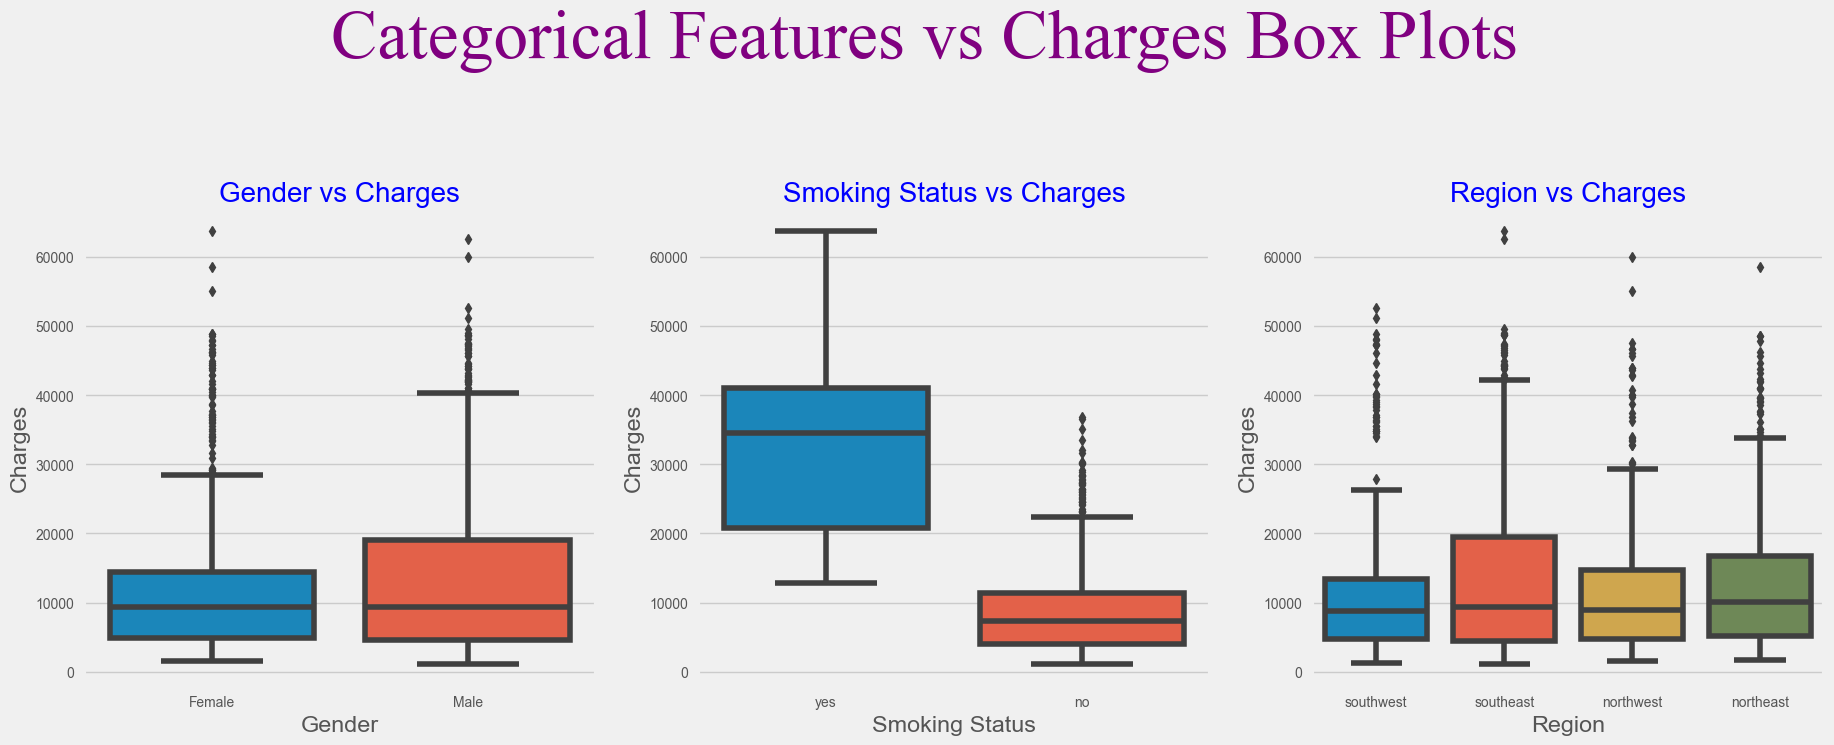

In [116]:
plt.figure(figsize=(20, 20))
plt.tight_layout()
plt.suptitle("Categorical Features vs Charges Box Plots", fontname ='Times New Roman', size = 50, color ='purple')
# Gender Boxplots
plt.subplot(3, 3, 1)
sns.boxplot(x = 'Sex', y = 'Charges', data = insurance)
plt.title("Gender vs Charges", size = 20, color ='blue')
plt.xlabel("Gender")

# Smoking Status
plt.subplot(3,3,2)
sns.boxplot(x = 'Smoker', y = 'Charges', data = insurance)
plt.title("Smoking Status vs Charges", size = 20, color ='blue')
plt.xlabel("Smoking Status")

# Region
plt.subplot(3,3,3)
sns.boxplot(x = 'Region', y = 'Charges', data = insurance)
plt.title("Region vs Charges", size = 20, color ='blue')
plt.xlabel("Region")


In [117]:
gender = pd.DataFrame(insurance['Sex'].value_counts())

In [118]:
gender = pd.DataFrame(insurance.Sex.value_counts())

In [119]:
print(insurance['Sex'].unique())

['Female' 'Male']


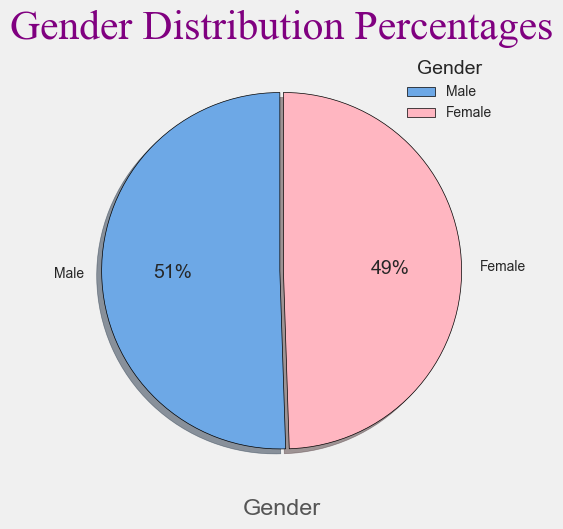

In [120]:
gender_counts = insurance['Sex'].value_counts()

varient_colors = ['#6DA8E6', '#FFB6C1']
explode = (0.01, 0.01)

plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.0f%%', explode=explode, startangle=90, shadow=True, colors=varient_colors, wedgeprops={'edgecolor': 'black'})
plt.title("Gender Distribution Percentages", fontname='Times New Roman', size=30, color='purple')
plt.legend(gender_counts.index, title='Gender', loc='upper right')
plt.xlabel("Gender")
plt.show()

In [121]:
fig = px.pie(insurance, names='Smoker', title='Smoker vs. Non-Smoker Distribution')
fig.show()

Distribution of the dependents

/var/folders/53/rpt2yl3556bc53z6fbxr_0lh0000gn/T/ipykernel_4361/3328923015.py:3: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



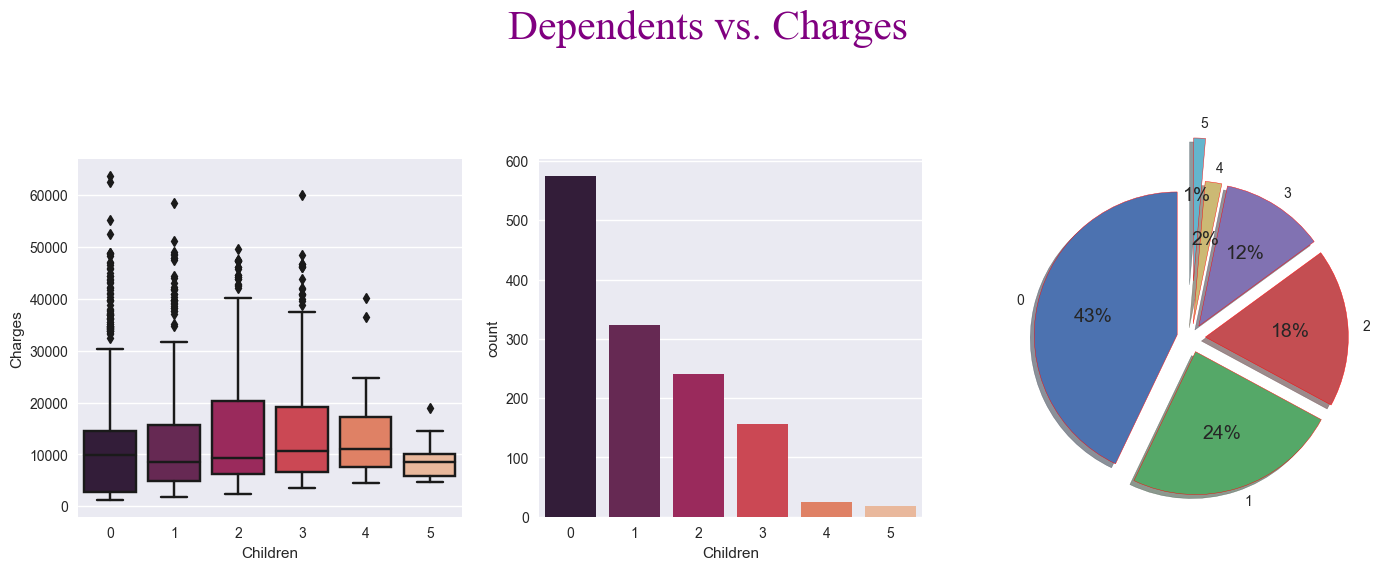

Children,0,1,2,3,4,5
count,574,324,240,157,25,18


In [122]:
child = pd.DataFrame(insurance['Children'].value_counts())

plt.style.use('seaborn')
plt.figure(figsize=(15,15))
plt.tight_layout()

# Set Plot Title for both subplots
plt.suptitle("Dependents vs. Charges", fontname ='Times New Roman', size = 30, color ='purple')

# box Plots
plt.subplot(3,3,1)
sns.boxplot(x = 'Children', y = 'Charges', data = insurance, palette=('rocket'))

# Count /Bar Plots
plt.subplot(3,3,2)
sns.countplot(x='Children', data=insurance, palette='rocket')

# Pie Chart
plt.subplot(3,3,3)
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.4)
labels=["0", "1", "2", "3", "4", "5"]
pie = plt.pie(insurance.Children.value_counts(),
              labels=labels,
              autopct='%1.0f%%', 
              explode=explode,
              #palette = ('rocket'),
              startangle=90, shadow=True, 
              wedgeprops={'edgecolor': 'red'})
plt.show()
child.T

/var/folders/53/rpt2yl3556bc53z6fbxr_0lh0000gn/T/ipykernel_4361/1504041149.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



<Figure size 1500x2000 with 0 Axes>

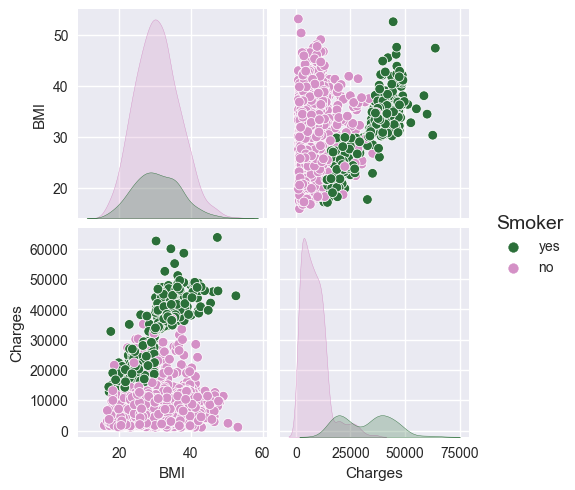

In [123]:
plt.figure(figsize=(15,20))
plt.style.use('seaborn')
sns.pairplot(insurance[['BMI', 'Charges', 'Sex', 'Smoker']], hue="Smoker", 
             hue_order=None, palette = 'cubehelix');

In [124]:
data_frame = insurance
# Minimum price of the data
minimum_price = np.min(data_frame["Charges"])
# Alternative using pandas
# minimum_price = prices.min()

# Maximum price of the data
maximum_price = np.max(data_frame["Charges"])
# Alternative using pandas
# maximum_price = prices.max()

# Mean price of the data
mean_price = np.mean(data_frame["Charges"])
# Alternative using pandas
# mean_price = prices.mean()

# Median price of the data
median_price = np.median(data_frame["Charges"])
# Alternative using pandas
# median_price = prices.median()

# Standard deviation of prices of the data
std_price = np.std(data_frame["Charges"])
# Alternative using pandas 
# std_price = prices.std(ddof=0)

# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(data_frame["Charges"], 25)
third_quartile = np.percentile(data_frame["Charges"], 75)
inter_quartile = third_quartile - first_quartile

# We show the calculated statistics
print("\tStatistics for charges:")
print('-'*42)
print("Minimum charges:                ${:,.2f}".format(minimum_price))
print("Maximum charges:                ${:,.2f}".format(maximum_price))
print("Average charges:                ${:,.2f}".format(mean_price))
print("Median charge:                  ${:,.2f}".format(median_price))
print("Standard deviation of charges:  ${:,.2f}".format(std_price))
print("First quartile of charges:      ${:,.2f}".format(first_quartile))
print("Second quartile of charges:     ${:,.2f}".format(third_quartile))
print("Interquartile (IQR) of charges: ${:,.2f}".format(inter_quartile))
print('-'*42)

	Statistics for charges:
------------------------------------------
Minimum charges:                $1,121.87
Maximum charges:                $63,770.43
Average charges:                $13,270.42
Median charge:                  $9,382.03
Standard deviation of charges:  $12,105.48
First quartile of charges:      $4,740.29
Second quartile of charges:     $16,639.91
Interquartile (IQR) of charges: $11,899.63
------------------------------------------


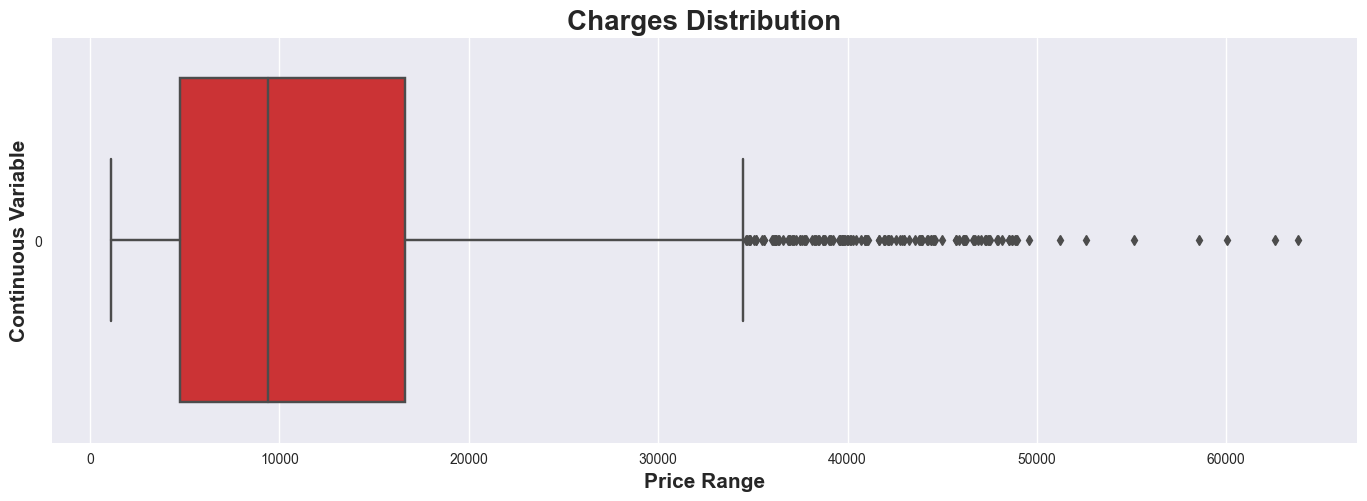

In [125]:
plt.figure(figsize = [15,5])
sns.boxplot(data=insurance['Charges'], orient="h", palette="Set1")
plt.title("Charges Distribution", fontsize = 20, fontweight = 'bold')
plt.xlabel("Price Range", fontsize = 15, fontweight= 'bold')
plt.ylabel("Continuous Variable", fontsize = 15, fontweight= 'bold')
plt.show()

In [126]:
# Label Encoding for Sex and Smoker columns
# importing label encoder
from sklearn.preprocessing import LabelEncoder

# creating a label encode
le = LabelEncoder()

# Lvabel encoding for sex: 0 for females and 1 --> Males
insurance['Sex'] = le.fit_transform(insurance['Sex'])

# Label encoding for smoker: 0 for Smoker; 1 for non-smoker
insurance['Smoker'] = le.fit_transform(insurance['Smoker'])

# Label encoding for Region
insurance['Region'] = le.fit_transform(insurance['Region'])

# check if the changes took effect
insurance.head()

,Age,Sex,BMI,Children,Smoker,Region,Charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


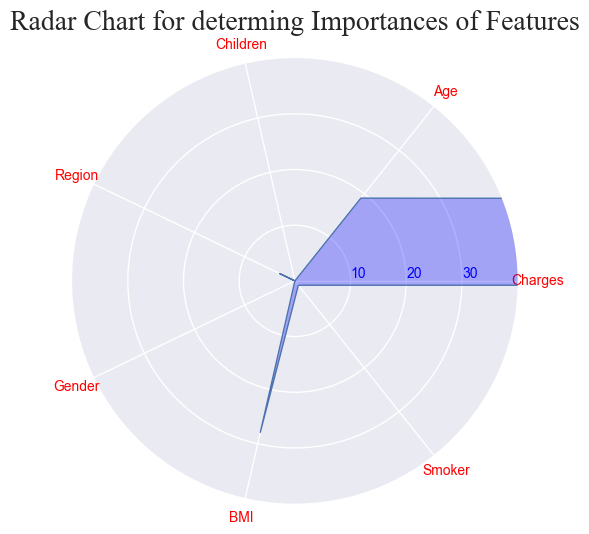

In [127]:
data = insurance

# Set data
df = pd.DataFrame({'group': [i for i in range(0, 1338)],
                   'Charges': data['Charges'],
                   'Age': data['Age'],
                   'Children': data['Children'],
                   'Region':data['Region'],
                   'Gender':data['Sex'],
                   'BMI': data['BMI'],
                   'Smoker':data['Smoker']})
 
# number of variable
categories = list(df)[1:]
N = len(categories)
 
# We are going to plot the first line of the data frame.
# But we need to repeat the first value to close the circular graph:
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
values
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories, color='red', size=10)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([10,20,30], ["10","20","30"], color="blue", size=10)
plt.ylim(0,40)
 
# Plot data
ax.plot(angles, values, linewidth=1, linestyle='solid')
plt.title('Radar Chart for determing Importances of Features', fontsize = 20, fontname="Times New Roman") 

# Fill area
ax.fill(angles, values, 'b', alpha=.3)

In [128]:
# splitting the dependent and independent variables
#X = claim.drop('charges', axis = 1)
insure_data = insurance[['Age', 'BMI', 'Children', 'Sex', 'Smoker', 'Charges']]

X = insure_data.drop(['Charges'], axis = 1)
y = insure_data.Charges
X.head()

,Age,BMI,Children,Sex,Smoker
0,19,27.900,0,0,1
1,18,33.770,1,1,0
2,28,33.000,3,1,0
3,33,22.705,0,1,0
4,32,28.880,0,1,0


In [129]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, test_size = 0.2, random_state = 30)

In [130]:
print('X_train has', X_train.shape[0], 'rows, y_train also has', y_train.shape[0], 'rows')
print('-'*49)
print('X_test has', X_test.shape[0], 'rows, y_test also has', y_test.shape[0], 'rows')
print('-'*49)

X_train has 1070 rows, y_train also has 1070 rows
-------------------------------------------------
X_test has 268 rows, y_test also has 268 rows
-------------------------------------------------


In [131]:
from sklearn.preprocessing import StandardScaler as SS

X_train = SS().fit_transform(X_train)
X_test = SS().fit_transform(X_test)

In [132]:
lin_reg_mod = LinearRegression()

# Train the model using the X_train  and y_train sets
lin_reg_mod.fit(X_train, y_train)

LinearRegression()

In [133]:
lin_reg_y_test_pred = lin_reg_mod.predict(X_test)

In [134]:
from sklearn.metrics import r2_score

# Print RSquare Score for test data
print("Test data R-squared score for Linear Regression Model is {}".format(r2_score(y_test, lin_reg_y_test_pred)))

Test data R-squared score for Linear Regression Model is 0.7549043319540901


In [135]:
from sklearn.tree import DecisionTreeRegressor
# Assign DecisionTreeRegressor to the variable "dt_regressor"
dt_regressor = DecisionTreeRegressor(random_state=0)
# Fit the training data to the model
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [136]:
dt_y_test_pred = dt_regressor.predict(X_test)

In [137]:
dt_regressor.score(X_test, y_test)

# Evaluate the model
print("Test dataset df_regressor score for Decision Tree Regression Model is {}".format(dt_regressor.score(X_test, y_test)))

Test dataset df_regressor score for Decision Tree Regression Model is 0.746077952888505


In [138]:
from sklearn.ensemble import RandomForestRegressor
# Assign the RandomForestRegressor to rf
rf_regressor = RandomForestRegressor(n_estimators = 10,
                           criterion = 'squared_error', 
                           random_state = 0,
                           n_jobs = -1)
# Fit the Model with training data
rf_regressor.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.



RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=0)

In [139]:
rf_y_test_pred = rf_regressor.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.



In [140]:
print("Test dataset R-squared score for Random Forest Regressor Model is {}".format(rf_regressor.score(X_test, y_test)))

Test dataset R-squared score for Random Forest Regressor Model is 0.830260540731523


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.



In [141]:
print("Linear Regression RSquared Score is {}".format(r2_score(y_test, lin_reg_y_test_pred)))
print("Decision Tree Regression   Score is {}".format(dt_regressor.score(X_test, y_test)))
print("Random Forest Regressor    Score is {}".format(rf_regressor.score(X_test, y_test)))

Linear Regression RSquared Score is 0.7549043319540901
Decision Tree Regression   Score is 0.746077952888505
Random Forest Regressor    Score is 0.830260540731523


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.



In [142]:
lr_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': lin_reg_y_test_pred})
dt_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': dt_y_test_pred})
rf_df = pd.DataFrame({'Real Values': y_test, 'Predicted Values': rf_y_test_pred})

Text(0, 0.5, 'Price')

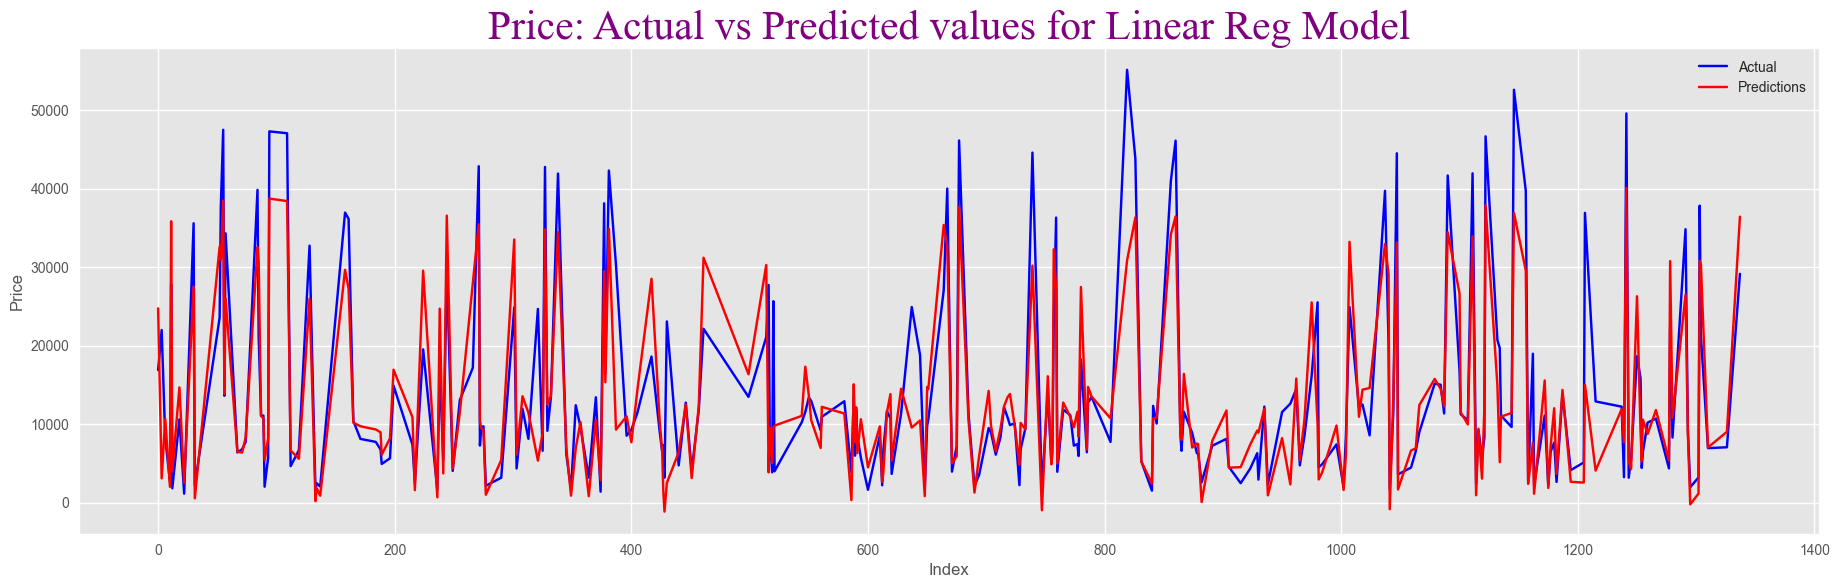

In [143]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 6))
# Linear Reg Model Predictions 
sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = lin_reg_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Price: Actual vs Predicted values for Linear Reg Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Price")

Text(0.5, 1.0, 'Actual vs Predicted values')

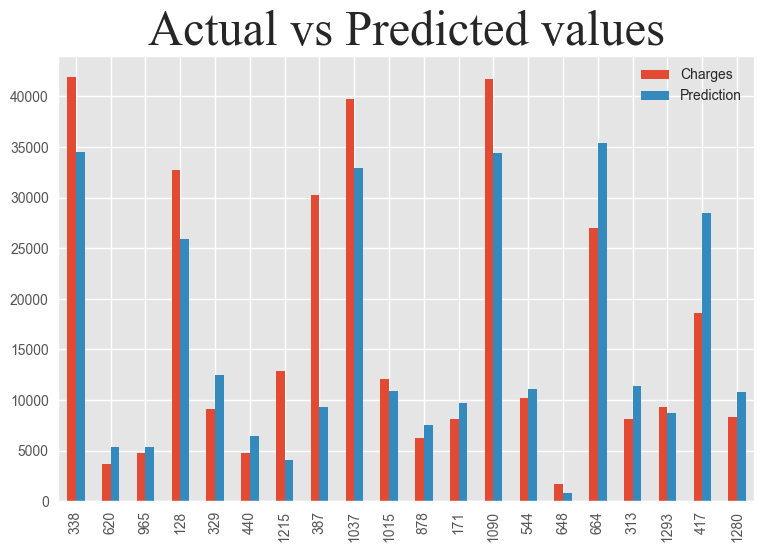

In [144]:
# Model Prediction on Test Data
LinPrediction = lin_reg_mod.predict(X_test)

# Turn future_forecast into a Dataframe
future_forecast = pd.DataFrame(LinPrediction, index = y_test.index, columns=['Prediction'])

# Bring it together with the original/real dataset
forecast_fig = pd.concat([y_test,future_forecast], axis=1)

# Graph the forecast vs real data
figsize = (30,5)
forecast_fig.head(20).plot(kind='bar')
plt.title('Actual vs Predicted values', size = 35, fontname = "Times New Roman")

Text(0, 0.5, 'Charges')

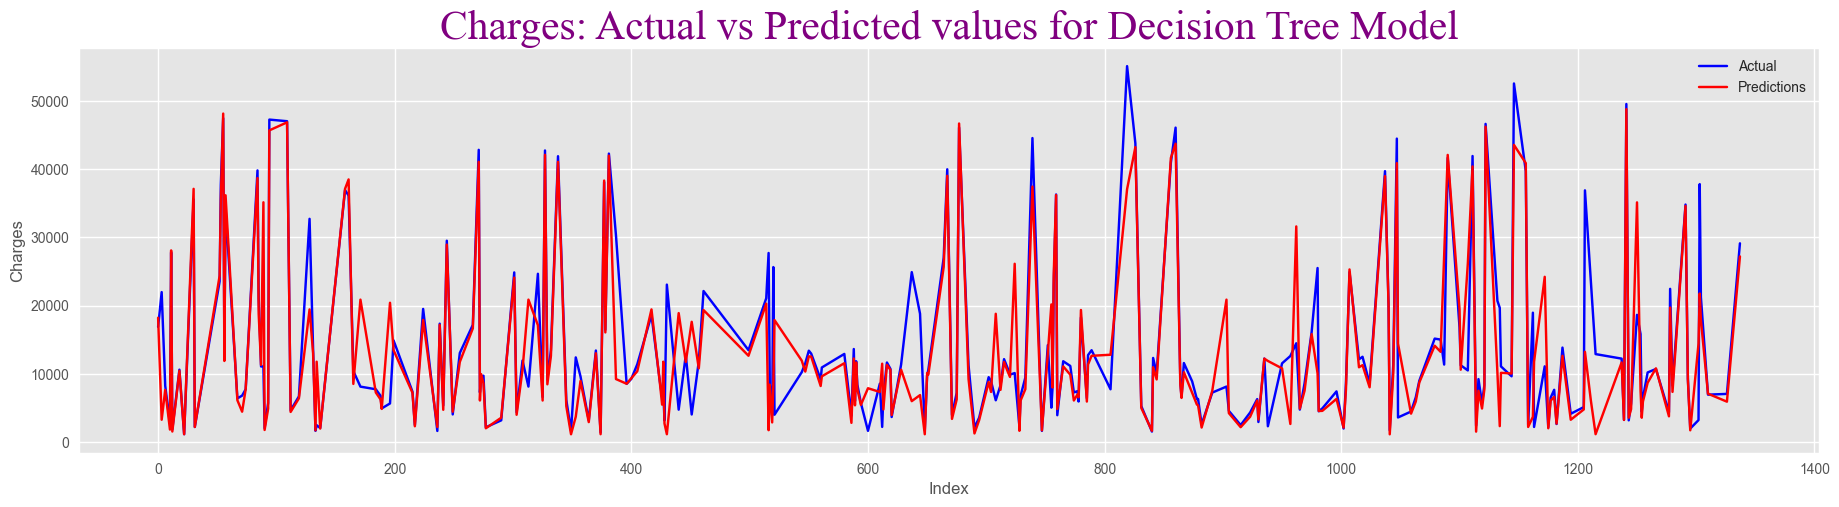

In [145]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))
#
sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = dt_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Charges: Actual vs Predicted values for Decision Tree Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Charges")

Text(0.5, 1.0, 'Actual vs Predicted values')

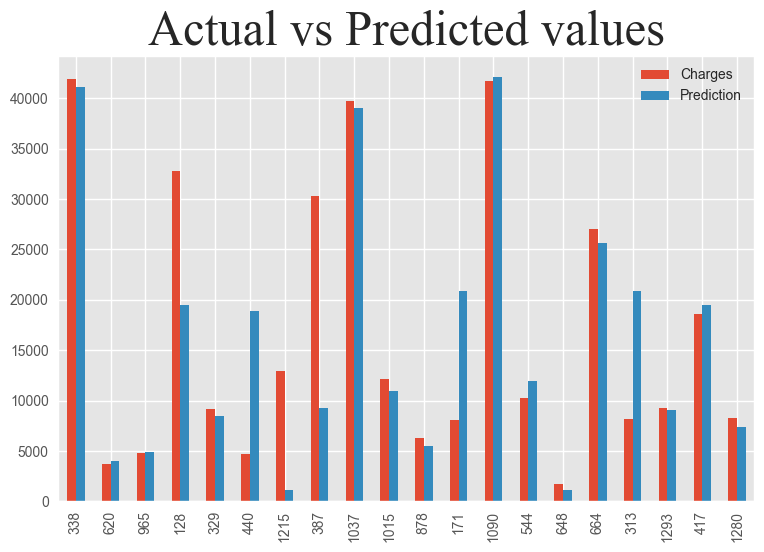

In [146]:
# Model Prediction on Test Data
DtPrediction = dt_regressor.predict(X_test)

# Turn future_forecast into a Dataframe
future_forecast = pd.DataFrame(DtPrediction, index = y_test.index, columns=['Prediction'])

# Bring it together with the original/real dataset
forecast_fig = pd.concat([y_test,future_forecast], axis=1)

# Graph the forecast vs real data
figsize = (15,5)
forecast_fig.head(20).plot(kind='bar')
plt.title('Actual vs Predicted values', size = 35, fontname = "Times New Roman")

Text(0, 0.5, 'Price')

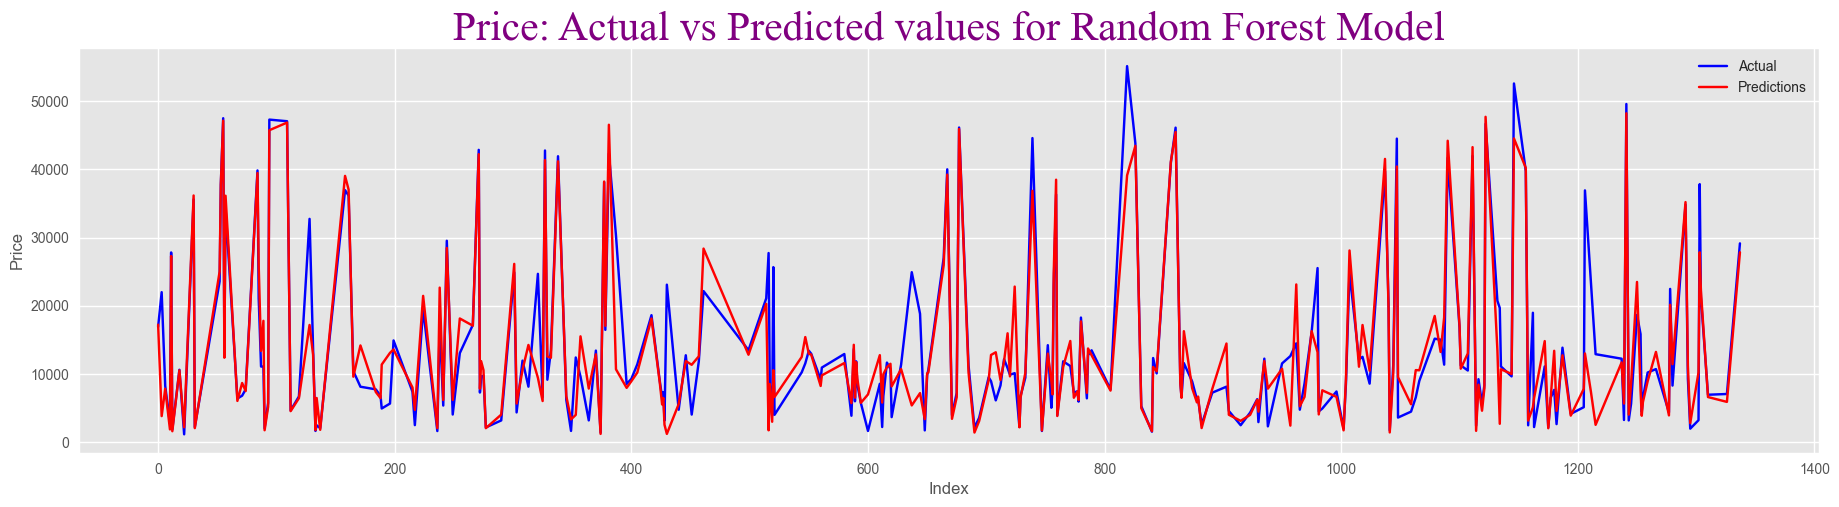

In [147]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(20, 5))

sns.lineplot(x = y_test.index, y = y_test, label = "Actual", color = "blue", ax = ax)
sns.lineplot(x = y_test.index, y = rf_y_test_pred, label = "Predictions", color = "red", ax = ax)
ax.set_title("Price: Actual vs Predicted values for Random Forest Model", fontname ='Times New Roman', size = 30, color ='purple')
ax.set_xlabel("Index")
ax.set_ylabel("Price")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.



Text(0.5, 1.0, 'Actual vs Predicted values')

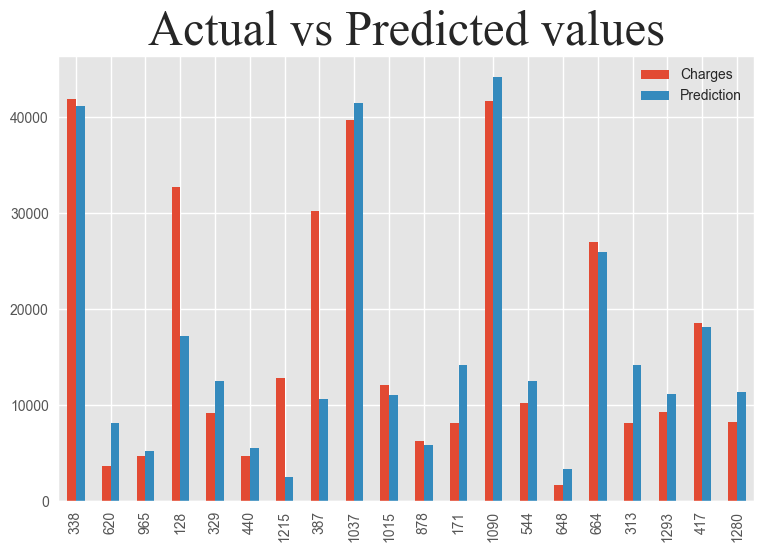

In [148]:
# Model Prediction on Test Data
RFPrediction = rf_regressor.predict(X_test)

# Turn future_forecast into a Dataframe
future_forecast = pd.DataFrame(RFPrediction, index = y_test.index, columns=['Prediction'])

# Bring it together with the original/real dataset
forecast_fig = pd.concat([y_test,future_forecast], axis=1)

# Graph the forecast vs real data
figsize = (15,5)
forecast_fig.head(20).plot(kind='bar')
plt.title('Actual vs Predicted values', size = 35, fontname = "Times New Roman")

In [149]:
quote = rf_regressor.predict(np.asarray([20, 30, 5, 1, 1]).reshape(-1,5))

# Print Quote
print("Quote based on Random Forest Model is $",round(float(quote), 2))

Quote based on Random Forest Model is $ 59020.95


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.



In [150]:
quote1 = rf_regressor.predict(np.asarray([20, 30, 5, 1, 0]).reshape(-1,5))

# Print Quote
print("Quote based on Random Forest Model is $",round(float(quote1), 2))

Quote based on Random Forest Model is $ 25775.28


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/multiprocessing/resource_tracker.py:104: UserWarning:

resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.

